In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy.sql import text


In [3]:
engine = create_engine("sqlite:///Instructions//Resources/hawaii.sqlite", echo=False)

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
conn = engine.connect()


In [6]:
s = text(
     "SELECT  measurements.date, sum(measurements.prcp)   "
         "FROM measurements "
         "where date between '2016-08-01' and '2017-07-31' "
         " group by measurements.date"
         " order by date ")
#conn.execute(s, x='m', y='z', e1='%@aol.com', e2='%@msn.com').fetchall()
result = conn.execute(s).fetchall()
#print(result)

In [7]:

dateList = [fld1[0] for fld1 in result]
prcpList = [fld2[1] for fld2 in result]

prsp_df = pd.DataFrame(
    {'Date': dateList,
     'Prscp': prcpList
    } )
prsp_df = prsp_df.set_index('Date')

prsp_df.head(10)

,Prscp
Date,
2016-08-01,8.71
2016-08-02,2.84
2016-08-03,0.05
2016-08-04,1.81
2016-08-05,0.34
2016-08-06,0.25
2016-08-07,3.34
2016-08-08,0.66
2016-08-09,0.59


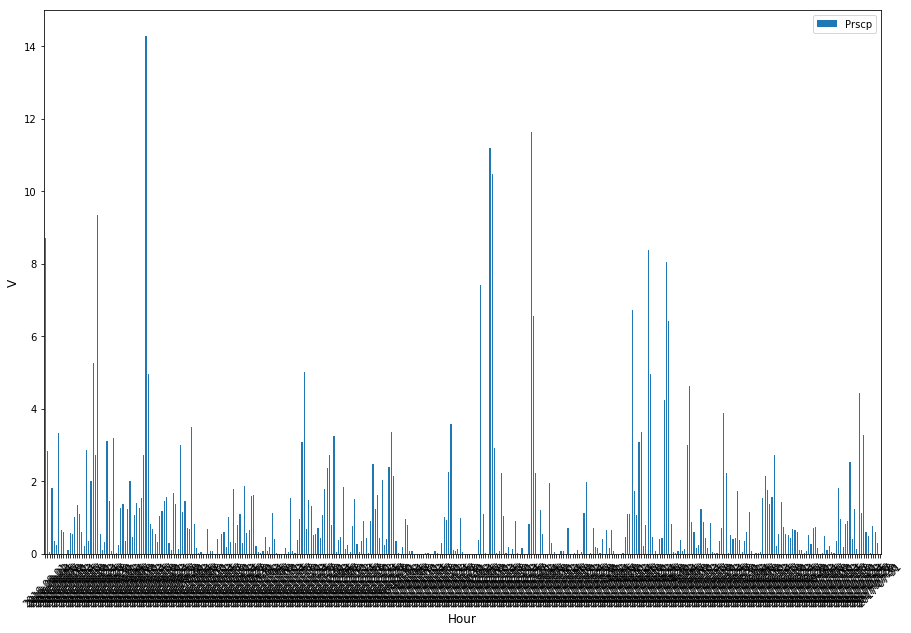

In [54]:
ax = prsp_df.plot(kind='bar', rot=45, legend=True, figsize=(15, 10))

#, title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
ax.xaxis_date()
ax.set_xticklabels([])

plt.show()



In [9]:
mnthList = []
for x in dateList:
    if x[5:7] == '01': mnthList.append('January')
    elif x[5:7] == '02': mnthList.append('February')
    elif x[5:7] == '03': mnthList.append('March')
    elif x[5:7] == '04': mnthList.append('April')
    elif x[5:7] == '05': mnthList.append('May')
    elif x[5:7] == '06': mnthList.append('June')
    elif x[5:7] == '07': mnthList.append('July')
    elif x[5:7] == '08': mnthList.append('August')
    elif x[5:7] == '09': mnthList.append('September')
    elif x[5:7] == '10': mnthList.append('October')
    elif x[5:7] == '11': mnthList.append('November')
    else : mnthList.append('December')

mnthList 
mnth_df = pd.DataFrame(
    {'Date': dateList,
     'Prscp': prcpList,
      'Month': mnthList
    } )
mnth_df = mnth_df.set_index('Date')
mnth_df.head()

,Month,Prscp
Date,,
2016-08-01,August,8.71
2016-08-02,August,2.84
2016-08-03,August,0.05
2016-08-04,August,1.81
2016-08-05,August,0.34


In [10]:
grouped_df = mnth_df.groupby(['Month'])
mnth_sum = grouped_df["Prscp"].sum()
mnth_sum

Month
April        54.91
August       55.39
December     35.51
February     39.06
January      11.95
July         23.72
June         20.52
March        29.62
May          25.27
November     20.56
October      21.77
September    49.40
Name: Prscp, dtype: float64

In [11]:
s = text(
     "SELECT  count(*)   "
         "FROM stations ")

#conn.execute(s, x='m', y='z', e1='%@aol.com', e2='%@msn.com').fetchall()
cnt = conn.execute(s).fetchone()
print(f'Total number of Stations: {cnt[0]}')

Total number of Stations: 9


In [12]:
s = text(
     "SELECT  measurements.station, count(*)   "
         "FROM measurements "
         " group by measurements.station"
         " order by count(*) desc ")
#conn.execute(s, x='m', y='z', e1='%@aol.com', e2='%@msn.com').fetchall()
staCnt = conn.execute(s).fetchall()

for row in staCnt:
    print(f'Station: {row[0]} Observation Count: {row[1]}')

Station: USC00519281 Observation Count: 2772
Station: USC00519397 Observation Count: 2724
Station: USC00513117 Observation Count: 2709
Station: USC00519523 Observation Count: 2669
Station: USC00516128 Observation Count: 2612
Station: USC00514830 Observation Count: 2202
Station: USC00511918 Observation Count: 1979
Station: USC00517948 Observation Count: 1372
Station: USC00518838 Observation Count: 511


In [13]:
# get the current date and then subtract a year from it because there is no data in the database for 2018
from datetime import date, timedelta
now = date.today()
#now = now.isoformat()
print('test')
one_yr = timedelta(days=365)
two_yr = timedelta(days=730)

now = now - one_yr
last_yr = now - one_yr


#last_yr = last_yr.isoformat()
last_year = last_yr.strftime('%Y-%m-%d')
now_str =  now.strftime('%Y-%m-%d')
#now_str = "'" + now_str + "'"
#last_year = "'" + last_year + "'"
print (last_year)

test
2016-09-17


In [16]:
print (now_str)

2017-08-28


In [16]:
#Get the results for only the station with the most observations

s = text(
     "SELECT  m.station, m.date, m.prcp, m.tobs  "
         " FROM measurements m "
         " join (SELECT  mx.station, count(*) "
         "  FROM measurements mx "
         "  where mx.date between :x and :y "
         "  group by mx.station "
         "  order by count(*) desc limit 1 ) as t1 on "
         " m.station = t1.station "
         " where m.date between :x and :y "
         " group by m.date"
         " order by m.date ")
test = conn.execute(s, x=last_year, y=now_str).fetchall()
#test = conn.execute(s).fetchall()


In [17]:
staLst =  [fld1[0] for fld1 in test]
dateLst = [fld2[1] for fld2 in test]
prcpLst = [fld3[2] for fld3 in test]
tobsLst = [fld4[3] for fld4 in test]


test_df = pd.DataFrame(
    {'Date': dateLst,
     'Prscp': prcpLst,
     'Tobs':  tobsLst
    } )
test_df = test_df.set_index('Date')

print(f'station1 {staLst[0]}: station 50: {staLst[50]}')
test_df.head()

station1 USC00519397: station 50: USC00519397


,Prscp,Tobs
Date,,
2016-09-17,0.05,79
2016-09-18,0.00,81
2016-09-19,0.00,77
2016-09-20,0.00,77
2016-09-21,0.00,78


<function matplotlib.pyplot.show>

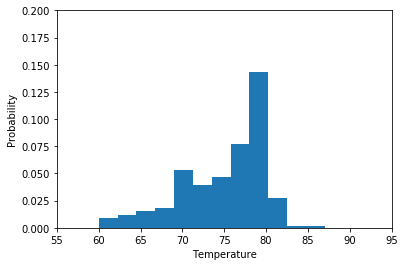

In [18]:
plt.hist(tobsLst,density=1, bins=12) 
plt.axis([55, 95, 0, 0.2]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.show

In [19]:
from datetime import datetime

def calc_temp():
    begin_dte = input("enter a begin date for your trip (format yyyy-mm-dd)")
    #check for valid date format
    if begin_dte[0:4] >= '2000' and begin_dte[0:4] <= '2018'\
        and begin_dte[4] == '-' and begin_dte[7] ==  '-' \
        and begin_dte[5:7] >= '01' and begin_dte[5:7] <= '12' \
        and begin_dte[8:] >= '01' and begin_dte[8:] <= '31':
        print ("it good")
    else:
        print("it bad")
    #print(begin_dte)
    
    end_dte = input("enter a begin date for your trip (format yyyy-mm-dd)")
    #check for valid date format
    if end_dte[0:4] >= '2000' and end_dte[0:4] <= '2018'\
        and end_dte[4] == '-' and end_dte[7] ==  '-' \
        and end_dte[5:7] >= '01' and end_dte[5:7] <= '12' \
        and end_dte[8:] >= '01' and end_dte[8:] <= '31':
        print ("it good")
    else:
        print("it bad")
    #print(end_dte)
    # perfor the query for min, max, average temps for that time period
    
    begin_object = datetime.strptime(begin_dte, '%Y-%m-%d')
    end_object = datetime.strptime(end_dte, '%Y-%m-%d')
    
    print (f'da date {begin_object}')
    one_yr = timedelta(days=365)


    begin_object = begin_object - one_yr
    end_object = end_object - one_yr
    
#last_yr = last_yr.isoformat()
    begin_dte = begin_object.strftime('%Y-%m-%d')
    end_dte   = end_object.strftime('%Y-%m-%d')

#now_str =  now.strftime('%Y-%m-%d')
    print (f'da new date {end_dte}')
    
    s = text(
     "SELECT   min(m.tobs) minTemp, max(m.tobs) maxTemp, avg(m.tobs) avgTemp  "
         " FROM measurements m "
         " where m.date between :x and :y ")
         
    try:
        trip = conn.execute(s, x=last_year, y=now_str).fetchone()
    except:
        print("something went wrong with the query")
        return 0, 0, 0
         
    minTemp = trip[0]
    maxTemp = trip[1]
    avgTemp = trip[2]
        
    
    return minTemp, maxTemp, avgTemp
    
x, y, z = calc_temp()
print(f'Min temp For Given time interval for last year : {x}; Max Temp: {y}; Avg Temp {z}' )

enter a begin date for your trip (format yyyy-mm-dd)2017-01-01
it good
enter a begin date for your trip (format yyyy-mm-dd)2017-01-31
it good
da date 2017-01-01 00:00:00
da new date 2016-02-01
Min temp For Given time interval for last year : 58; Max Temp: 87; Avg Temp 74.34427812650894


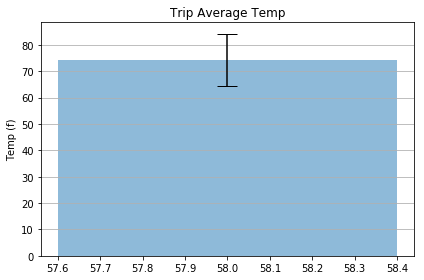

In [38]:
x_pos = 1
error = [[x],[y]]

fig, ax = plt.subplots()
ax.bar(x, z, yerr=10, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temp (f)')
#ax.set_xticks(x_pos)
#ax.set_xticklabels(z)
ax.set_title('Trip Average Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [30]:
error

[[58], [87]]

In [22]:
Stations = Base.classes.stations

Measurements = Base.classes.measurements

# Create our session (link) from Python to the DB
session = Session(engine)


In [29]:
#conn.close()
import numpy as np

results = session.query(Stations.name).all()

all_names = list(np.ravel(results))
all_names

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [30]:
#session.commit()

now = date.today()

one_yr = timedelta(days=365)


now = now - one_yr
last_yr = now - one_yr


#last_yr = last_yr.isoformat()
last_year = last_yr.strftime('%Y-%m-%d')
now_str =  now.strftime('%Y-%m-%d')

# get the precip amounts from the observation place with 
s = text(
 "SELECT   m.date, max(m.prcp) maxPrcp, max( m.tobs) maxTobs  "
     " FROM measurements m "
     " join (SELECT  mx.station, count(*) "
     "  FROM measurements mx "
     "  where mx.date between :x and :y "
     "  group by mx.station "
     "  order by count(*) desc limit 1 ) as t1 on "
     " m.station = t1.station "
     " where m.date between :x and :y "
     " group by m.date"
     " order by m.date ")
results = conn.execute(s, x=last_year, y=now_str).fetchall()


# Create a dictionary from the row data and append to a list of all_passengers
all_dates = []
for prcp in results:
    prcp_dict = {}
    prcp_dict["date"] = prcp[0]
    prcp_dict["prcp"] = prcp[1]
    all_dates.append(prcp_dict)

all_dates

[{'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': 0.0},
 {'date': '2016-09-06', 'prcp': 0.0},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05},
 {'date': '2016-09-18', 'prcp': 0.0},
 {'date': '2016-09-19', 'prcp': 0.0},
 {'date': '2016-09-20', 'prcp': 0.0},
 {'date': '2016-09-21', 'prcp': 0.0},
 {'date': '2016-09-22', 'prcp': 0.02},
